# Desafío - Estimando curvas normales

## 1. Importe un csv
<li>Importe el set de datos creados por usted al final de la sesión pasada.</li>

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sample = pd.read_csv('subsample_bm_demo.csv')

## 2. Importe su conjunto de funciones

<li>Genere un archivo ancilliary_funcs.py para guardar las funciones creadas en la
sesión pasada e impórtelo.</li>
<li>Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la
muestra importada.</li>


In [2]:
import ancilliary_funcs as aux

for col in aux.columns:
    print('El análisis de la columna {} muestra {}'.format(col['name'], aux.lostData(sample, col['name'])))

El análisis de la columna undp_hdi muestra {'count': 4, 'percent': 4.123711340206185}
El análisis de la columna ccodealp muestra {'count': 0, 'percent': 0.0}
El análisis de la columna ht_region muestra {'count': 0, 'percent': 0.0}
El análisis de la columna ht_region_name muestra {'count': 0, 'percent': 0.0}
El análisis de la columna gle_cgdpc muestra {'count': 0, 'percent': 0.0}
El análisis de la columna imf_pop muestra {'count': 24, 'percent': 24.742268041237114}
El análisis de la columna ffp_hf muestra {'count': 6, 'percent': 6.185567010309279}
El análisis de la columna wef_qes muestra {'count': 18, 'percent': 18.556701030927837}
El análisis de la columna wdi_expedu muestra {'count': 28, 'percent': 28.865979381443296}
El análisis de la columna wdi_ners muestra {'count': 27, 'percent': 27.835051546391753}


## 3. Estime el puntaje Z de una variable

Estime el puntaje Z la variables que posea la menor cantidad de datos perdidos (o que no
posea).
Genere una nueva columna en la tabla de datos que contenga el puntaje Z de dicha
variable. Recuerde que para calcular el puntaje z de una observación se utiliza la
fórmula:
$$ z_i = \frac{ x_i−\tilde{x}}{\sigma (x)} $$

In [3]:
colMean = sample['gle_cgdpc'].mean()
colStd = sample['gle_cgdpc'].std()
sample['gle_cgdpc_z'] = (sample['gle_cgdpc'] - colMean)/colStd

In [32]:
# Se quitan las filas donde 'gle_cgdpc' es NaN, y se ordena ascendentemente según el puntaje Z
orderedDf = sample.dropna(subset=['gle_cgdpc']).sort_values(by=['gle_cgdpc_z'])
print(colMean)
print('Primeras 10 observaciones:')
print(orderedDf.head(10).loc[:, ['gle_cgdpc', 'gle_cgdpc_z']])
print(colMean + 2*colStd)
print('últimas 10 observaciones:')
print(orderedDf.tail(10).loc[:, ['gle_cgdpc', 'gle_cgdpc_z']])

12614.236230412376
Primeras 10 observaciones:
     gle_cgdpc  gle_cgdpc_z
72   332.26999    -0.945505
6    644.53998    -0.921465
81   938.34998    -0.898847
74   961.26001    -0.897083
73   972.35999    -0.896228
60  1007.28000    -0.893540
10  1024.93990    -0.892181
83  1063.26000    -0.889231
39  1095.96000    -0.886713
8   1282.64000    -0.872342
38593.9431041763
últimas 10 observaciones:
    gle_cgdpc  gle_cgdpc_z
37  33965.871     1.643716
59  34007.898     1.646952
31  34791.051     1.707241
92  36958.211     1.874076
65  37406.762     1.908607
18  39000.910     2.031330
68  42258.352     2.282098
57  47769.699     2.706379
23  50454.410     2.913056
88  61404.480     3.756027


Se puede notar que las 10 primeras y ultimas observaciones de la muestrea ordenada según <code>'gle_cgdpc_z'</code> son también las 10 primeras y ultimas observaciones al ordenarlas según <code>'gle_cgdpc'</code>

## 4. Estime el puntaje z de las regiones
Utilizando el resultado anterior, visualice su nueva variable estandarizada (es decir, luego de
calcular el puntaje Z).
<li>Para ello realice un <code>dotplot</code> que muestre el valor promedio de su variable por cada
región.</li>
<li>Agregue además una línea que muestre el promedio total de la variable (es decir,
antes de agrupar).</li>


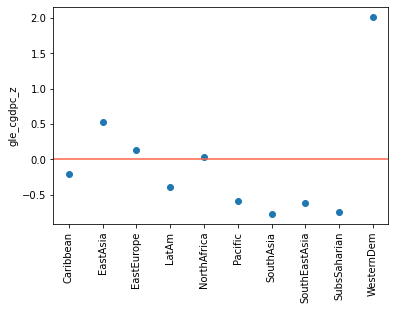

In [71]:
regionMeans = orderedDf.groupby(by='ht_region_name')['gle_cgdpc_z'].mean()
globalMean = orderedDf['gle_cgdpc_z'].mean()
plt.plot(regionMeans, marker='o', linestyle="none")
plt.xticks(rotation=90)
plt.ylabel('gle_cgdpc_z')
plt.axhline(globalMean, color="tomato")

## 5. Curvas de Densidad de Probabilidad

<li>Genere una función que permita visualizar las curvas de Densidad de Probabilidad</li>
para las variables <code>imf_pop</code>, <code>gle_cgdpc</code> y <code>wdi_exph</code>.
<li>La función debe contener como argumentos:
<ul>
<li><code>df</code>: Tabla de datos 1.</li>
<li><code>variable</code>: Variable a contrastar.</li>
</ul>
</li>


In [102]:
def plotProbabilityDensity(df, variable):
    def fdp_normal(x, mu = 0, sigma = 1):
        """docstring for fdp_normal"""
        bracket_exponencial = np.exp(-(x - mu) ** 2 / (2 * sigma **2))
        frac = np.sqrt(2 * np.pi) * sigma
        return (frac ** -1) * bracket_exponencial
    xaxis = df.dropna(subset=[variable]).sort_values(variable)[variable]
    plt.plot(xaxis, [fdp_normal(x, xaxis.mean(), xaxis.std()) for x in xaxis])

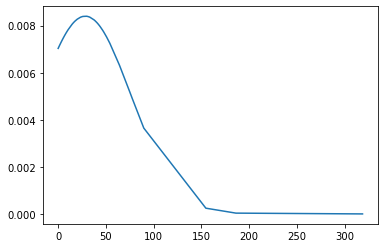

In [103]:
plotProbabilityDensity(orderedDf, 'imf_pop')


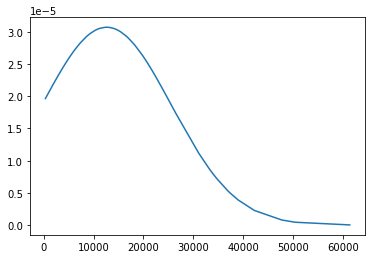

In [99]:
plotProbabilityDensity(orderedDf, 'gle_cgdpc')


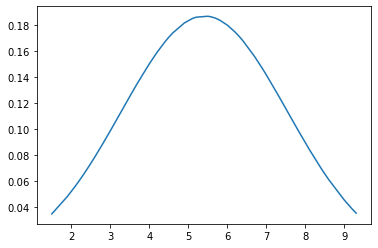

In [100]:
plotProbabilityDensity(orderedDf, 'ffp_hf') # no existe wdi_exph por lo que saqué la con menor número de NaNs de mis columnas